In [1]:
import cv2
import numpy as np
import skimage.io as si
import matplotlib.pyplot as plt

## 1. Boolean `AND`
[References](https://docs.opencv.org/master/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14).
### 1.1. Introduction.
For `x = np.uint8([a])` and `y = np.uint8([b])`. We have

$$ x \& y = \text{cv2.bitwise_and}(x, y) = \min \lbrace a, b \rbrace $$

$\qquad \qquad \bullet$ So, `white-pixel AND black-pixel` returns `black`

$\qquad \qquad \bullet$ The `lower pixel values` will be remained on the `boolean AND operator`

$\qquad \qquad \bullet$ `x & y = y & x`

In [2]:
x = np.uint8([8])
y = np.uint8([255])
z = np.uint8([121])
u = np.uint8([0])

print(x & y, cv2.bitwise_and(x, y))
print(x & x, cv2.bitwise_and(x, x))
print(y & z, cv2.bitwise_and(y, z))
print(x & z, cv2.bitwise_and(x, z))
print(x & u, cv2.bitwise_and(x, u))

[8] [[8]]
[8] [[8]]
[121] [[121]]
[8] [[8]]
[0] [[0]]


### 1.2. EXERCISE
#### 1.2.1. Exercise 1. `Black` `AND` `White`
In this exercise, you will be asked to generate `a half-black_white-rectangle` and `a white in black rectangle`; alias `A` and `B` with the same size. Then, displaying `A & B` and `cv2.bitwise_and(A, B)`

Finally, write the code to examine wheter `A & B` is equal to `cv2.bitwise_and(A, B)`.

Checking pointwise equality of the last 2 images:  True


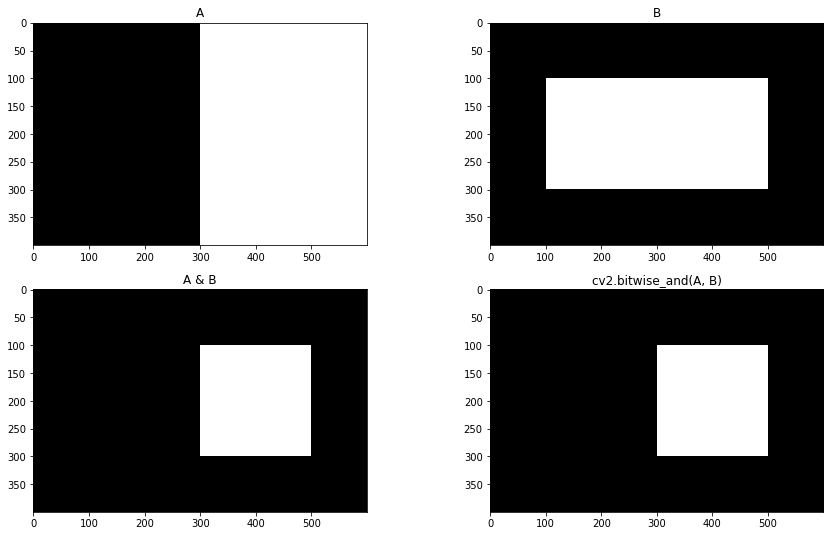

In [3]:
A = np.zeros((400, 600, 3), dtype = np.uint8)
B = A.copy()  ## create a copy from A

## A half-right of A is white
A[:, 300:] = 255

## A white rectangle inside B
B[100:300, 100:500] = 255

## create list of images & titles
images = [A, B, A&B, cv2.bitwise_and(A, B)]
titles = ['A', 'B', 'A & B', 'cv2.bitwise_and(A, B)']

## Display the results.
plt.figure(figsize = (15, 9))
for k in range(4):
    plt.subplot(2,2,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])
    
## Verify the 2 last images: (A & B) and (cv2.bitwise_and(A, B))
print("Checking pointwise equality of the last 2 images: ", (images[2] == images[3]).all() )

#### Exercise 1.2. `AND` between different color.
- **Question 1. `color image` `AND` `black`, `white` repectively** 

$\qquad \diamond$ **Step 1.** Firstly, you are asked to verify `Red & White` or `Red & Black` is `Red` or not?

$\qquad \bullet$ **SOLUTION.**

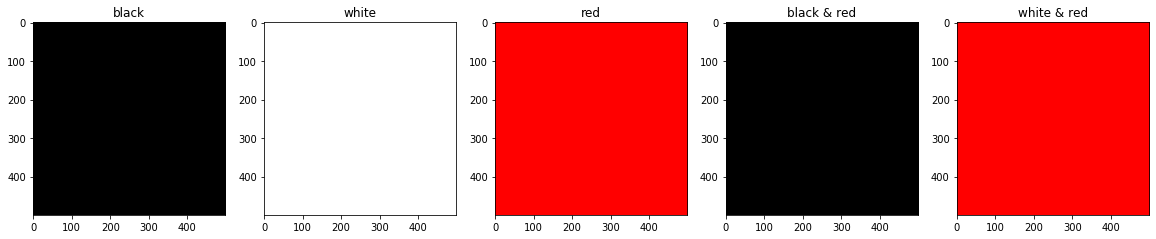

In [4]:
black = np.zeros((500, 500, 3), dtype = np.uint8)
white = black.copy(); white[:,:] = 255
red = black.copy(); red[:,:,0] = 255

images = [black, white, red, cv2.bitwise_and(black, red), cv2.bitwise_and(white, red)]
titles = ['black', 'white', 'red', 'black & red', 'white & red']

## Display the results.
plt.figure(figsize = (20, 5))
for k in range(5):
    plt.subplot(1,5,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])

$\qquad$ By the definition of `cv2.bitwise_and()`, and remind that 

                        black_pixel = [[[0,   0,  0]]]
                        red_pixel   = [[[255, 0,  0]]]
                        white_pixel = [[[255, 255, 255]]]
hence,                        
                        
                        black & red = [[[min(0, 255), 0, 0]]] = black
                        white & red = [[[min(255, 255), min(255, 0), min(255, 0)]]] = red
                        
$\qquad \diamond$ **Step 2.** Now, replace the `red` by the apple from the following image 

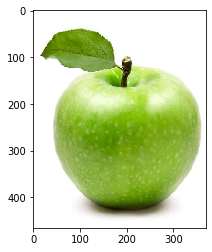

In [5]:
path = r"C:\Users\Admin\Desktop\apple_orange.jpg"
img = si.imread(path)
apple = img[:, :370, :]
#orange = img[:, 360:730]
plt.imshow(apple)
plt.show()

$\qquad \bullet$ **SOLUTION.** Remember that all the input must have the same-size; so we must generate the new `white, black`

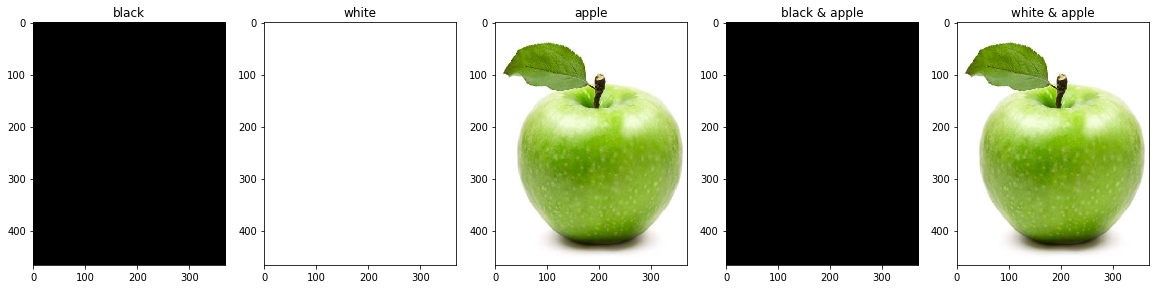

In [6]:
black = np.zeros(apple.shape, dtype = np.uint8)
white = black.copy(); white[:,:] = 255
images = [black, white, apple, cv2.bitwise_and(black, apple), cv2.bitwise_and(white, apple)]
titles = ['black', 'white', 'apple', 'black & apple', 'white & apple']

## Display the results.
plt.figure(figsize = (20, 5))
for k in range(5):
    plt.subplot(1,5,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])

- **Question 2. `Red` AND `Blue`, `Green`.**

$\qquad \bullet$ **SOLUTION**

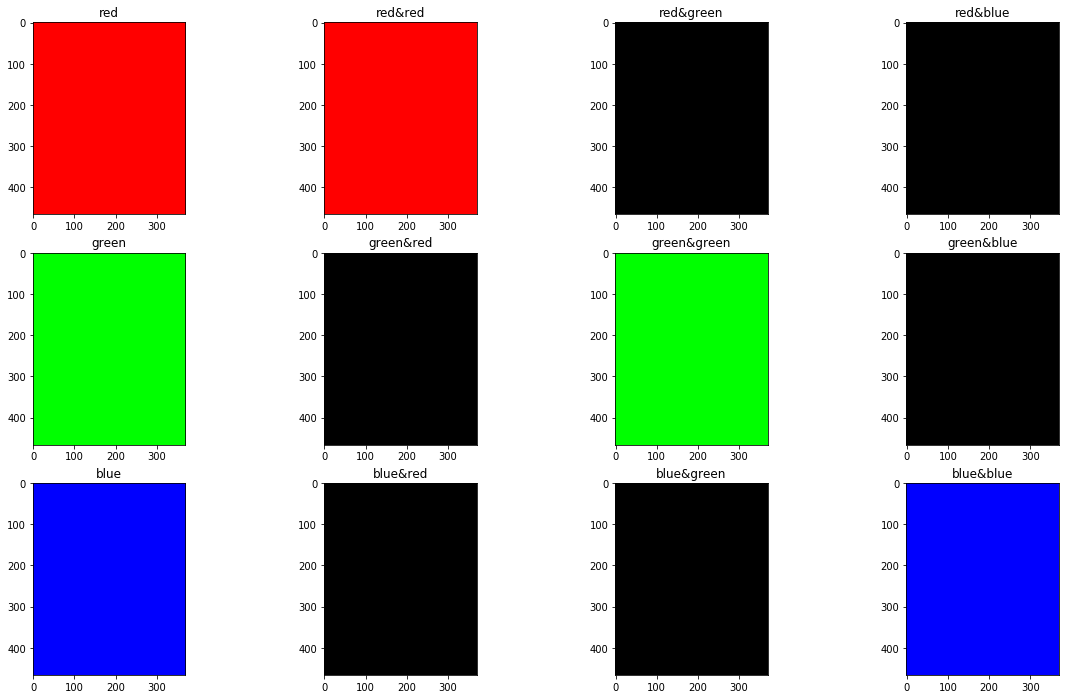

In [7]:
red = black.copy(); red[:,:,0] = 255
blue = black.copy(); blue[:,:,2] = 255
green = black.copy(); green[:,:,1] = 255

images = [red, red&red, red&green, red&blue,
         green, green&red, green&green, green&blue,
         blue, blue&red, blue&green, blue&blue]
titles = ['red', 'red&red', 'red&green', 'red&blue',
          'green', 'green&red', 'green&green', 'green&blue',
          'blue', 'blue&red', 'blue&green', 'blue&blue']

plt.figure(figsize = (20, 12))
for k in range(12):
    plt.subplot(3,4,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])

**Comments.** Since `red_pix = [[[255, 0, 0]]]` and `green_pix = [0, 255, 0]`, hence

                        red & red = [[[ min(255, 255), 0, 0 ]]] = red
                        red & green = [[[ min(255,0), min(0, 255), 0 ]]] = black

- **Question 3. `Apple` AND `Blue`, `Green`, `Red`.**

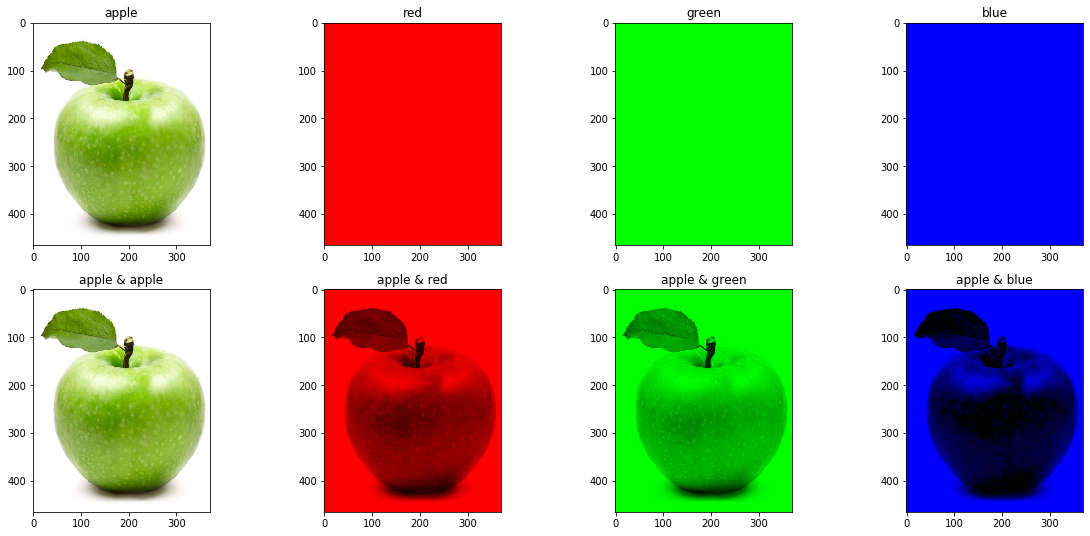

In [8]:
images = [ apple, red, green, blue,
          apple & apple, apple & red, apple & green, apple & blue]
titles = ['apple', 'red', 'green', 'blue',
          'apple & apple', 'apple & red', 'apple & green', 'apple & blue']

plt.figure(figsize = (20, 9))
for k in range(8):
    plt.subplot(2,4,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])

## 2. Boolean `OR`
### 2.1. Introduction.
For `x = np.uint8([a])` and `y = np.uint8([b])`. We have

$$ x \vert y = \text{cv2.bitwise_or}(x, y) = \left \lbrace \begin{array}{ll} \max \lbrace a, b \rbrace & \text{ if } a \neq b \\ 255 & \text{ if } a = b \end{array} \right. $$

$\qquad \qquad \bullet$ So, `white-pixel AND black-pixel` returns `white`

$\qquad \qquad \bullet$ The `higher pixel values` will be remained on the `boolean OR operator`

In [9]:
print(x, y, z, u)
print(y | z, cv2.bitwise_or(y, z))
print(y | z, cv2.bitwise_or(z, y))
print(x | x, cv2.bitwise_or(x, x))
print(x | z, cv2.bitwise_or(x, z))
print(x | u, cv2.bitwise_or(x, u))

[8] [255] [121] [0]
[255] [[255]]
[255] [[255]]
[8] [[8]]
[121] [[121]]
[8] [[8]]


### 2.2. EXERCISE.
#### Exercise 2.1. Repeat exercise 1.1. but replace `AND` by `OR`.
$\qquad$ **SOLUTION.**

Checking pointwise equality of the last 2 images:  True


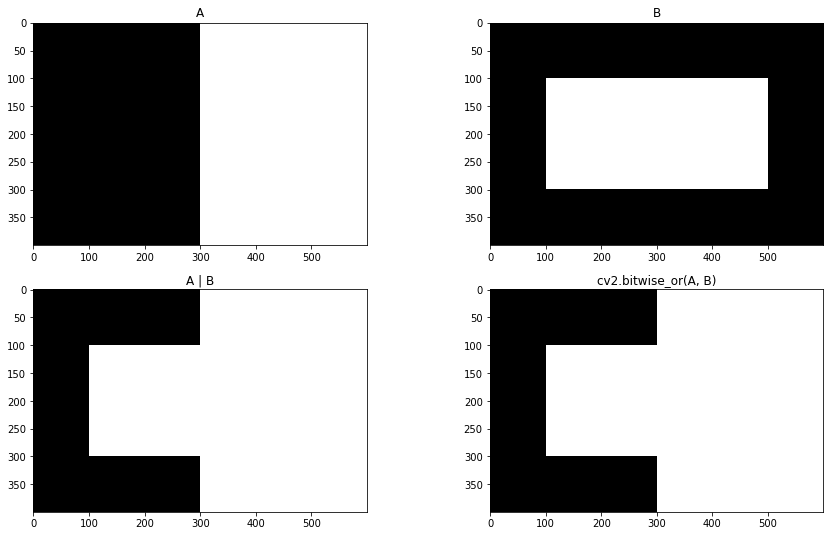

In [10]:
## create list of images & titles
images = [A, B, A|B, cv2.bitwise_or(A, B)]
titles = ['A', 'B', 'A | B', 'cv2.bitwise_or(A, B)']

## Display the results.
plt.figure(figsize = (15, 9))
for k in range(4):
    plt.subplot(2,2,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])
    
## Verify the 2 last images: (A | B) and (cv2.bitwise_or(A, B))
print("Checking pointwise equality of the last 2 images: ", (images[2] == images[3]).all() )

#### Exercise 2.2. Do the same thing as in Exercise 1.2 but using `OR`
- **Question 1. Step 1.**

$\qquad \bullet$ **SOLUTION.**

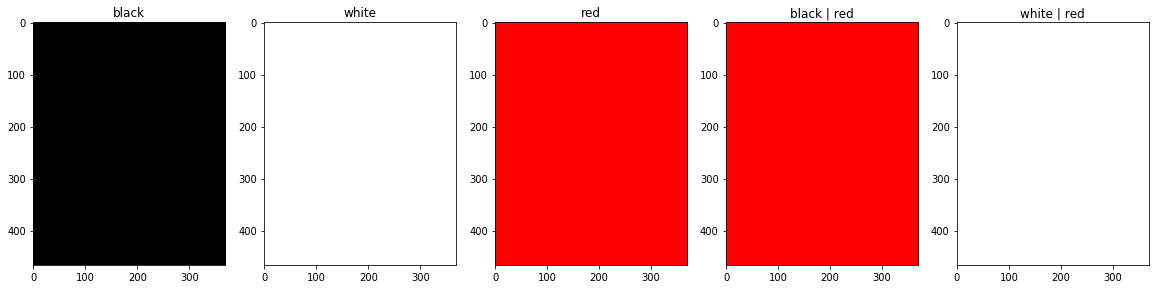

In [11]:
images = [black, white, red, cv2.bitwise_or(black, red), cv2.bitwise_or(white, red)]
titles = ['black', 'white', 'red', 'black | red', 'white | red']

## Display the results.
plt.figure(figsize = (20, 5))
for k in range(5):
    plt.subplot(1,5,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])

- **Question 1. Step 2.**

$\qquad \bullet$ **SOLUTION.**

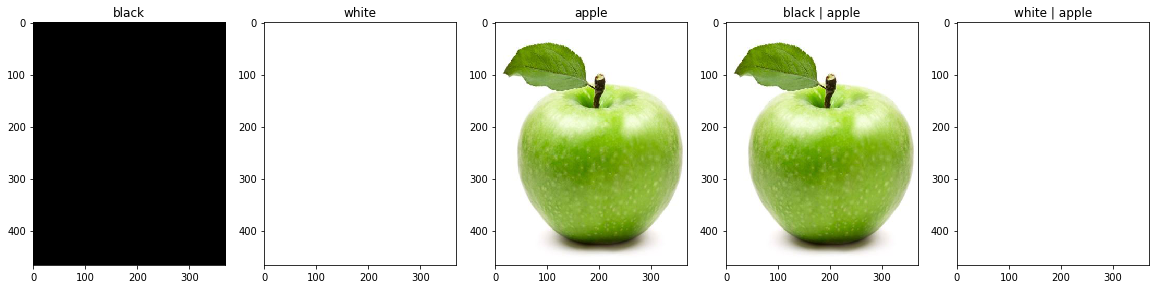

In [12]:
images = [black, white, apple, cv2.bitwise_or(black, apple), cv2.bitwise_or(white, apple)]
titles = ['black', 'white', 'apple', 'black | apple', 'white | apple']

## Display the results.
plt.figure(figsize = (20, 5))
for k in range(5):
    plt.subplot(1,5,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])

- **Question 2.**

$\qquad \bullet$ **SOLUTION.**

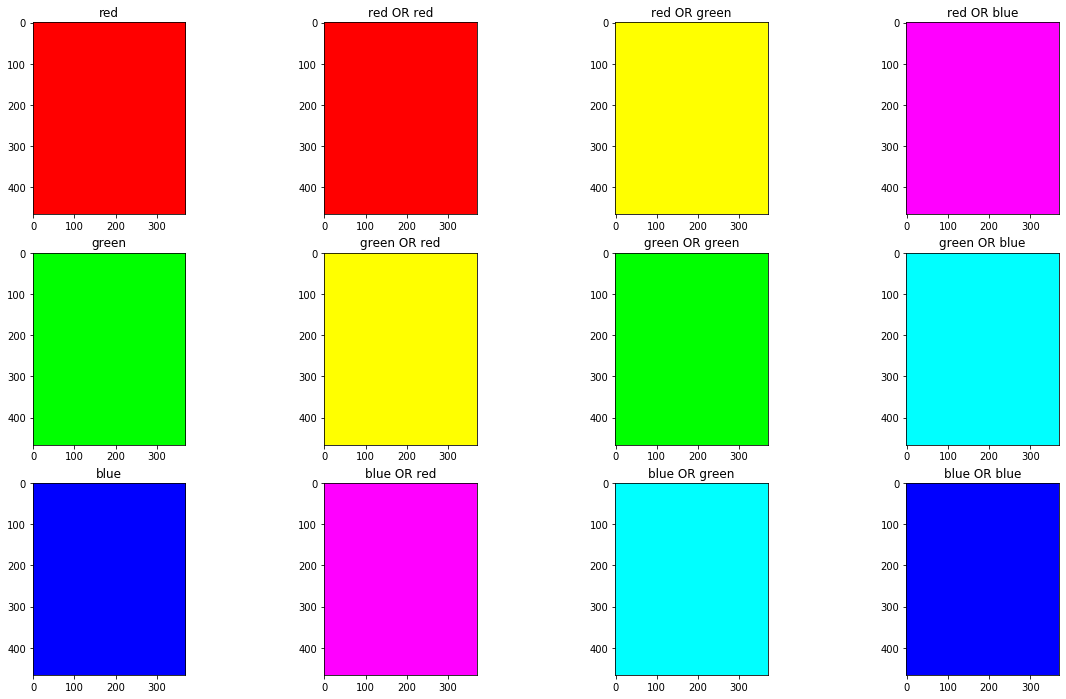

In [13]:
images = [red, red|red, red|green, red|blue,
         green, green|red, green|green, green|blue,
         blue, blue|red, blue|green, blue|blue]
titles = ['red', 'red OR red', 'red OR green', 'red OR blue',
          'green', 'green OR red', 'green OR green', 'green OR blue',
          'blue', 'blue OR red', 'blue OR green', 'blue OR blue']

plt.figure(figsize = (20, 12))
for k in range(12):
    plt.subplot(3,4,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])

- **Question 3.**

$\qquad \bullet$ **SOLUTION.**

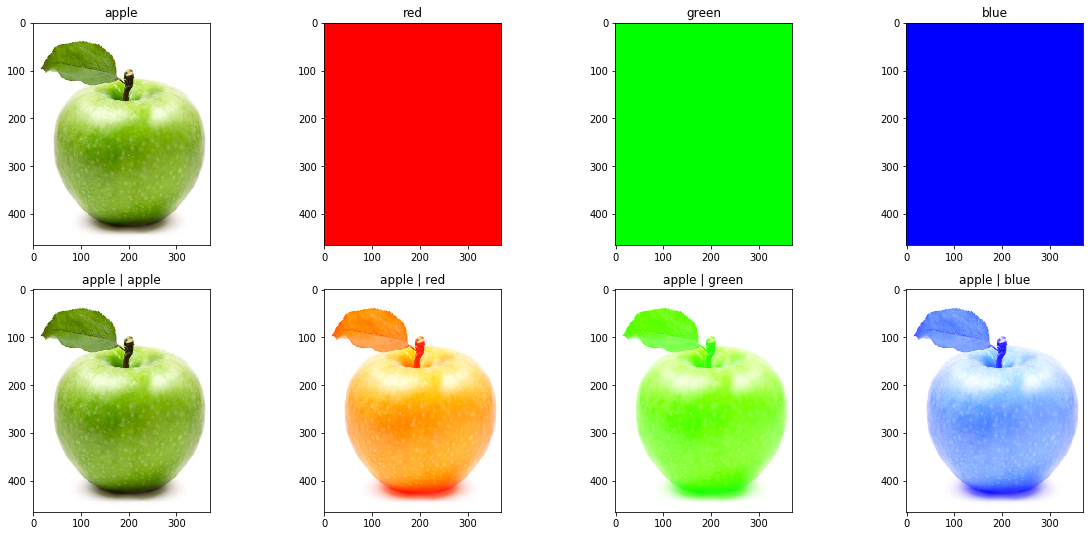

In [14]:
images = [ apple, red, green, blue,
          apple | apple, apple | red, apple | green, apple | blue]
titles = ['apple', 'red', 'green', 'blue',
          'apple | apple', 'apple | red', 'apple | green', 'apple | blue']

plt.figure(figsize = (20, 9))
for k in range(8):
    plt.subplot(2,4,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])

#### Exercise 2.3. `Magenta, Cyan, Yellow` apple.
You now are asked to generate the `magenta, cyan` and `yellow` apples. Use the results in the previous exercise!

**SOLUTION.**

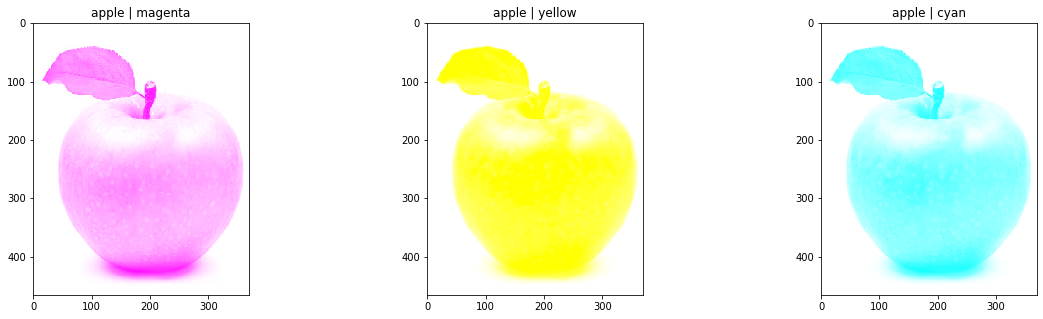

In [15]:
images = [apple|(red|blue), apple|(red|green), apple|(green|blue)]
titles = ['apple | magenta', 'apple | yellow', 'apple | cyan']
plt.figure(figsize = (20, 5))
for k in range(3):
    plt.subplot(1,3,k+1); plt.imshow(images[k]); plt.title(titles[k])

## 3. Boolean `NOT`
### 3.1. Introduction.
For `x = np.uint8([a])`. We have

$$ ~x = \text{cv2.bitwise_not}(x) = 255 - a $$

$\qquad \qquad \bullet$ So, complement of `white-pixel` returns `black`

$\qquad \qquad \bullet$ Complement of `red-pixel (255, 0, 0)` is `cyan (0, 255, 255)`

In [16]:
print('\t x\t~x \t cv2.bitwise_not(x)')
print('x = |\t', x, '\t', ~x, '\t', cv2.bitwise_not(x))
print('x = |\t', z,'\t', ~z, '\t', cv2.bitwise_not(z))

	 x	~x 	 cv2.bitwise_not(x)
x = |	 [8] 	 [247] 	 [[247]]
x = |	 [121] 	 [134] 	 [[134]]


### 3.2 EXERCISEs
#### Exercise 3.1. Complement of `black-white`

Checking pointwise equality of the last 2 images:  True


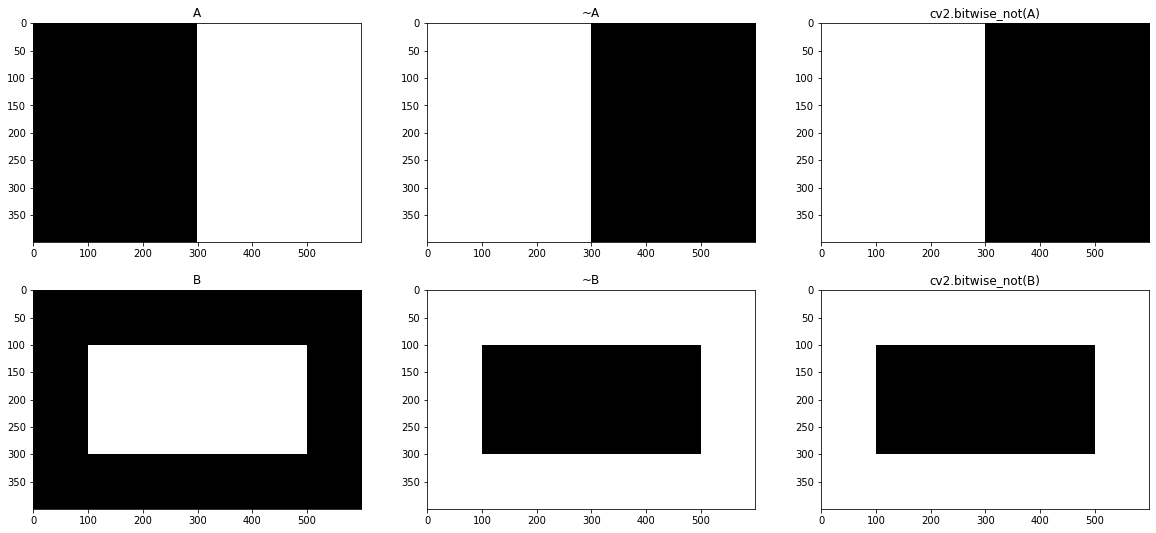

In [17]:
## create list of images & titles
images = [A, ~A, cv2.bitwise_not(A), B, ~B, cv2.bitwise_not(B)]

titles = ['A', '~A', 'cv2.bitwise_not(A)', 'B', '~B', 'cv2.bitwise_not(B)']

## Display the results.
plt.figure(figsize = (20, 9))
for k in range(6):
    plt.subplot(2,3,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])
    
## Verify the 2 last images:
print("Checking pointwise equality of the last 2 images: ", (images[-2] == images[-1]).all() )

#### Exercise 3.2. Complement of `color image`
$\qquad$ In this exercise, you are asked to examine the complement of `red, green, blue-pixel` and the `apple` in the previous exercies

$\qquad$ After all, display the inputs and their complements with the description-titles beside!

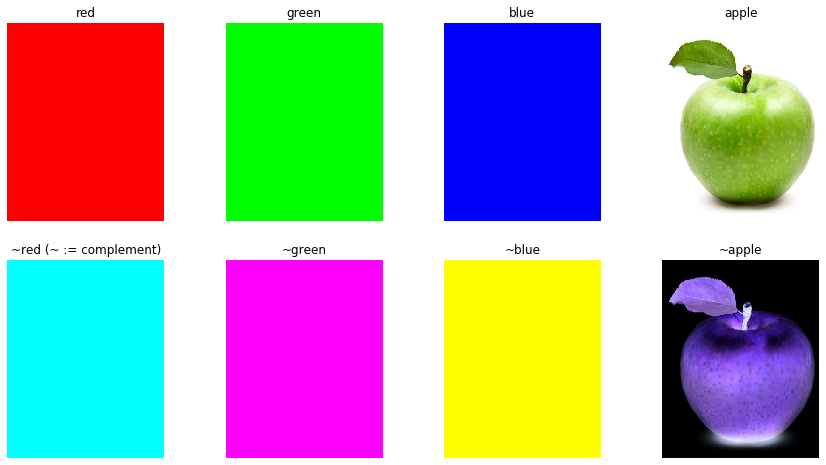

In [18]:
images = [red, green, blue, apple, ~red, ~green, ~blue, ~apple]
titles = ['red', 'green', 'blue', 'apple', '~red (~ := complement)', '~green', '~blue', '~apple']
plt.figure(figsize = (15, 8))
for k in range(8):
    plt.subplot(2,4,k+1); plt.imshow(images[k]); plt.title(titles[k]), plt.axis("off")

## 4. Boolean `XOR`
The function `cv2.bitwise_xor` calculates the per-element `bit-wise logical` `"exclusive-or"` operation for two arrays when they have the same size.
### 4.1. Introduction.
For `x = np.uint8([a])` and `y = np.uint8([b])`. We have

$$ \text{cv2.bitwise_xor}(x, y) = | a- b | = \text{cv2.bitwise_xor}(y, x)$$

$\qquad \qquad \bullet$ Of course, `cv2.bitwise_xor(x, y) = 0` iff `a = b`.

$\qquad \qquad \bullet$ Obviously, this definition is concides to

                                (x & ~y) | (~x & y)

In [19]:
print(y, z, cv2.bitwise_xor(z, y), cv2.bitwise_xor(y, z), (y & ~z) | (~y & z))
print(x, z, cv2.bitwise_xor(x, z), cv2.bitwise_xor(z, x), (x & ~z) | (~x & z))
print(x, y, cv2.bitwise_xor(x, y), cv2.bitwise_xor(y, x), (x & ~y) | (~x & y))
print(x, x, cv2.bitwise_xor(x, x), cv2.bitwise_xor(x, x), (x & ~x) | (~x & x))

[255] [121] [[134]] [[134]] [134]
[8] [121] [[113]] [[113]] [113]
[8] [255] [[247]] [[247]] [247]
[8] [8] [[0]] [[0]] [0]


### 4.2. EXERCISEs.
#### Exercise 4.1. Do the samething as in Exercise 1.1 and 1.2 but using `XOR`

Checking pointwise equality of the last 2 images:  True


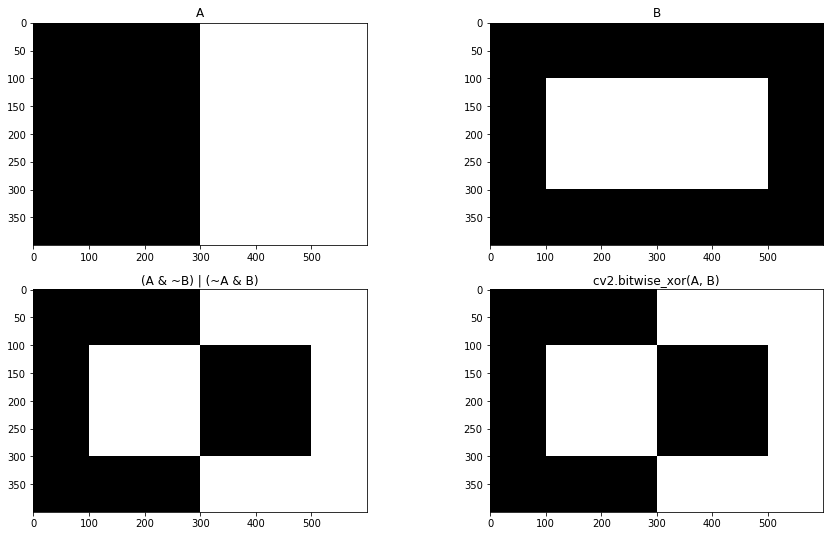

In [20]:
## create list of images & titles
images = [A, B, (A & ~B)|(~A & B), cv2.bitwise_xor(A, B)]
titles = ['A', 'B', '(A & ~B) | (~A & B)', 'cv2.bitwise_xor(A, B)']

## Display the results.
plt.figure(figsize = (15, 9))
for k in range(4):
    plt.subplot(2,2,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])
    
## Verify the 2 last images: (A | B) and (cv2.bitwise_or(A, B))
print("Checking pointwise equality of the last 2 images: ", (images[2] == images[3]).all() )

#### Exercise 4.2. Do the samething as in Exercise 1.2 and give the explaination,
- **Question 1 - Step 1.**

$\qquad \qquad$ **SOLUTION.**

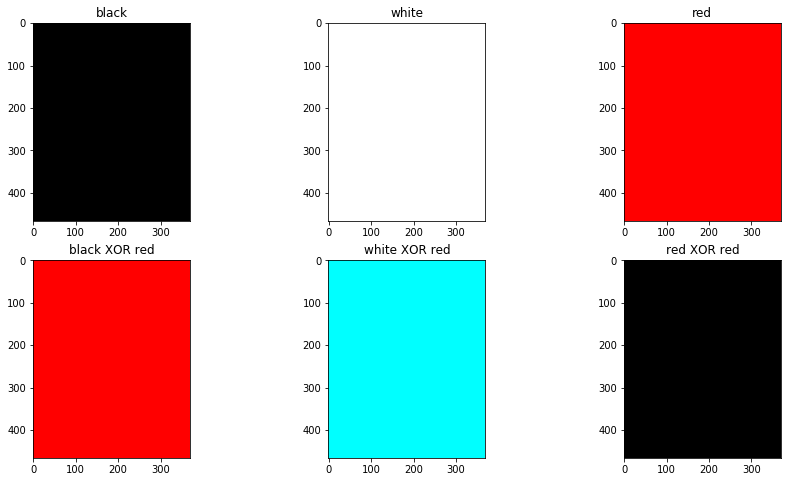

In [21]:
images = [black, white, red, 
          cv2.bitwise_xor(black, red), cv2.bitwise_xor(white, red), cv2.bitwise_xor(red, red)]
titles = ['black', 'white', 'red', 'black XOR red', 'white XOR red', 'red XOR red']

## Display the results.
plt.figure(figsize = (15, 8))
for k in range(6):
    plt.subplot(2,3,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])

**Comments - explaination**

$\qquad$ We have `red_pix = (255, 0, 0)`, `black = (0, 0, 0)` and `white = (255, 255, 255)`. Hence,

                        red XOR red = (0, 0, 0) = black
                        red XOR black = (255, 0, 0) = red
                        red XOR white = (0, 255, 255) = cyan
-----------------------------------

$\qquad$ **Step 2.**

$\qquad \qquad$ **SOLUTION.**

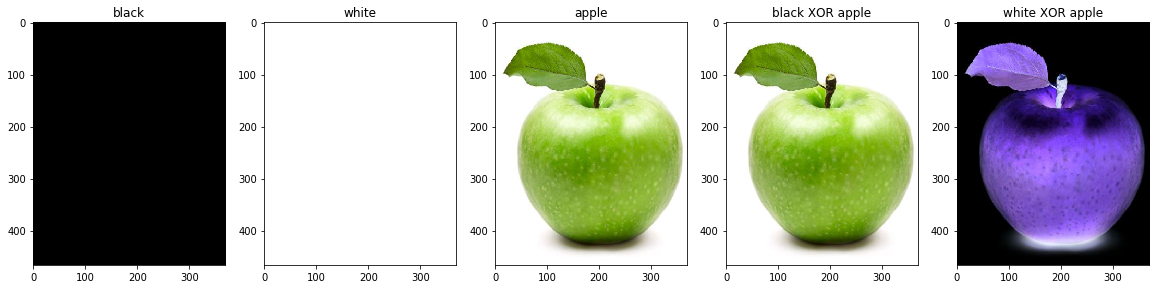

In [22]:
images = [black, white, apple, cv2.bitwise_xor(black, apple), cv2.bitwise_xor(white, apple)]
titles = ['black', 'white', 'apple', 'black XOR apple', 'white XOR apple']

## Display the results.
plt.figure(figsize = (20, 5))
for k in range(5):
    plt.subplot(1,5,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])

- Question 2.

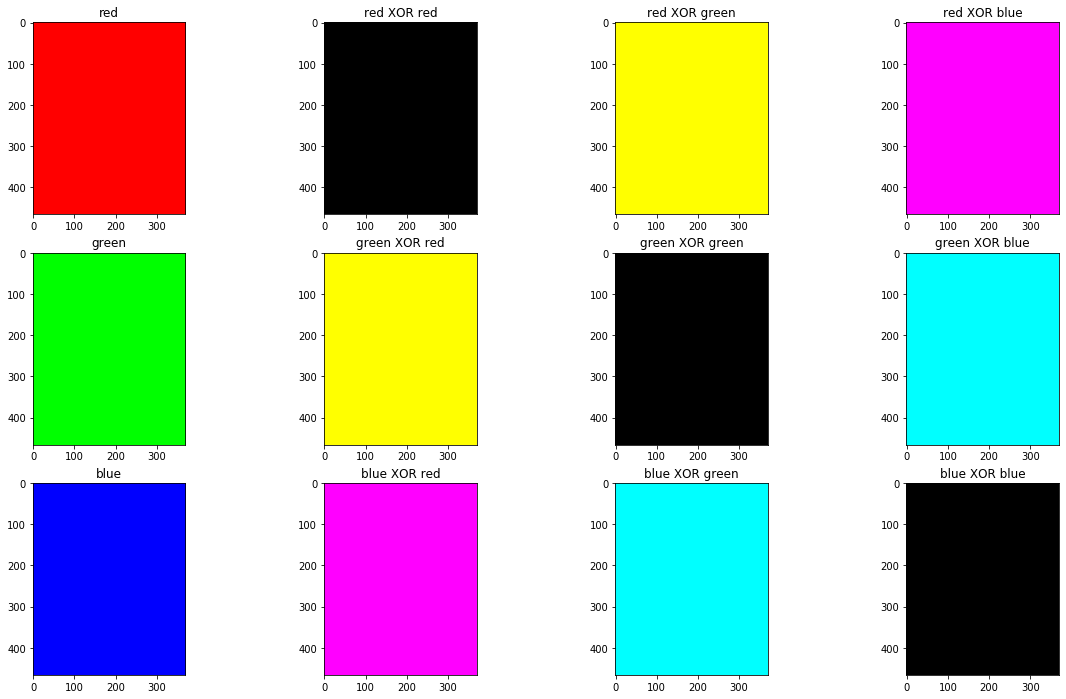

In [23]:
images = [red, cv2.bitwise_xor(red,red), cv2.bitwise_xor(red,green), cv2.bitwise_xor(red,blue),
          green, cv2.bitwise_xor(green,red), cv2.bitwise_xor(green,green), cv2.bitwise_xor(green,blue),
          blue, cv2.bitwise_xor(blue,red), cv2.bitwise_xor(blue,green), cv2.bitwise_xor(blue,blue)]
titles = ['red', 'red XOR red', 'red XOR green', 'red XOR blue',
          'green', 'green XOR red', 'green XOR green', 'green XOR blue',
          'blue', 'blue XOR red', 'blue XOR green', 'blue XOR blue']

plt.figure(figsize = (20, 12))
for k in range(12):
    plt.subplot(3,4,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])

- Question 3.

$\qquad \qquad$ SOLUTION.

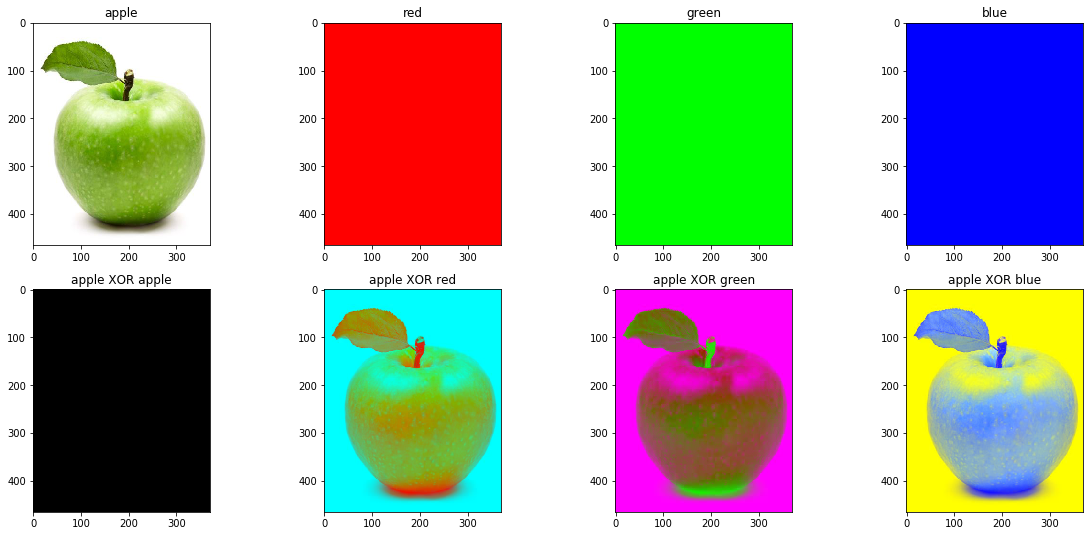

In [24]:
images = [ apple, red, green, blue,
          cv2.bitwise_xor(apple, apple), cv2.bitwise_xor(apple, red), 
          cv2.bitwise_xor(apple, green), cv2.bitwise_xor(apple, blue)]
titles = ['apple', 'red', 'green', 'blue',
          'apple XOR apple', 'apple XOR red', 'apple XOR green', 'apple XOR blue']

plt.figure(figsize = (20, 9))
for k in range(8):
    plt.subplot(2,4,k+1)
    plt.imshow(images[k])
    plt.title(titles[k])